<a href="https://colab.research.google.com/github/Namvi3t/DataProjects/blob/main/Sentiment_Analysis_on_Elon_Musk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on Elon Musk

### Project Description and Background:

A sentiment analysis is the act of computationally recognizing and classifying opinions stated in a text, particularly to ascertain if the writer has a favorable, negative, or neutral viewpoint on a certain subject, item, etc. This will detect any positive, negative, or neutral sentiment in text. For this example, I will be doing Elon Musk. Elon Musk has a been a topic of controversy when he decided to buy twitter and that caused an uprise on Twitter. It got me thinking about doing a sentiment analysis on Elon's Twitter Page to see what his page is like now since he bought Twitter.

# Important Note:
 - You need to have **ELEVATED** Access Twitter Developers account or else you will not be able to gather tweets.
 - Have a .txt file that will include api key, api secret key, access token, and secret access token. This is needed to pass the verification or else the code will not work.
 - Each Code block needs to be run in order of the code block you see.

###### By Samuel Do

In [1]:
#Import Files for sentiment analysis
import tweepy #Needed tor Tweepy
import re #Needed for Tweepy
from textblob import TextBlob #Process Textual data
from wordcloud import WordCloud #Help create the world cloud
import pandas as pd #Help use data structures and data analysis tools
import numpy as np #Help perform mathimatical arrays
import matplotlib.pyplot as plt #Help plot graphs
plt.style.use('dark_background') #What type of style/looks of the graph. Dark mode helps my eyes
from google.colab import files

# save your twitter developer account API key and secret and access key and secret in a txt file
# make sure there are no extra white space in your txt file
# upload this text file to Google Colab:

txtfile = files.upload() 
keys =  txtfile.get('twkeys.txt').splitlines()

# test your keys and secrets are correct or not:
apiKey = keys[0]
apiKeySecret = keys[1]
accessToken = keys[2]
accessTokenSecret = keys[3]
auth = tweepy.OAuthHandler(apiKey, apiKeySecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)
try:
  api.verify_credentials()
  print("verification successful!")  
except: 
  print("authentication error")  # if keys are NOT correct, you should see error

Saving twkeys.txt to twkeys.txt
verification successful!


# Gather the data

I have gathered a sample data of 200 tweets to help identify a pattern and trend of a larger dataset by using a subset of a population. Once I got the data, I put it into a Dataframe using Pandas. I showed the first 100 rows of the tweets and then I also showed the last 100 rows of the tweets. 

In [2]:
# Get 200 tweets from Elon Musk Twitter Page
posts = api.user_timeline(screen_name ="elonmusk", count=200, lang = "en", tweet_mode="extended")

# Print last 200 tweets from Elon Musk
print("Here are 200 recent tweets: \n")
i = 1
for tweet in posts[0:200]: #Print the 200 tweets 
  print(str(i) +')'+ tweet.full_text + "\n")
  i+=1

Here are 200 recent tweets: 

1)Team turned off 1 engine just before start &amp; 1 stopped itself, so 31 engines fired overall.

But still enough engines to reach orbit! https://t.co/QYx3oVM4Gw

2)RT @SpaceX: 33 Raptor engine static fire attempt soon https://t.co/wrsWIDt4Vt

3)RT @SpaceX: First static fire attempt of 33 Raptor engines on Booster 7 https://t.co/3haor6owfa

4)Attempting Starship 33 engine static fire https://t.co/FJ3tLsnlck

5)@BillyM2k Yes!

6)RT @BillyM2k: dude bookmarks are an awesome twitter feature, especially when preparing for a twitter spaces where you want to talk about pa…

7)@WholeMarsBlog Too many journalists want to shape your opinion, rather than inform you

8)@TrungTPhan It’s legit day 3 at this point

9)@TrungTPhan 🤣

10)RT @SpaceX: Starlink is now available in Iceland → https://t.co/slZbTmZmAt https://t.co/f7mKS8USnt

11)@B_Morrows Exactly

12)@Rainmaker1973 That engine performed an incredible number of transformations to match Mach number!

13)https://t

## Create a dataframe and display the first 100 tweets

In [3]:
#Create a dataframe 
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns =['Tweets'])

#Show the first 100 rows of data
df.head(100)


,Tweets
0,Team turned off 1 engine just before start &am...
1,RT @SpaceX: 33 Raptor engine static fire attem...
2,RT @SpaceX: First static fire attempt of 33 Ra...
3,Attempting Starship 33 engine static fire http...
4,@BillyM2k Yes!
...,...
95,@I_Katchanovski ??
96,@SPACEdotcom !
97,@TitterTakeover @Shopify @tobi @ptraughber @Tw...
98,@disclosetv @TwitterSupport We think we fixed ...


## Create the last 100 tweets

In [4]:
#Create a dataframe 
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns =['Tweets'])

#Show the last 100 rows of data
df.tail(100)

,Tweets
100,@ATabarrok 😂
101,"@unusual_whales To be extra clear, Twitter is ..."
102,@igorsushko !
103,RT @andst7: Starlink funziona perfettamente. T...
104,@MichaelCoudrey We would love to. Just waiting...
...,...
195,@BillyM2k @Gerashchenko_en SpaceX Starlink has...
196,"@Gerashchenko_en Damned if you do, damned if y..."
197,@JonErlichman True
198,"@TaraBull808 Yeah, it’s bizarre!"


# Text Cleaning

Its important to clean the text so that we can get a true accurate representation of the sentiment analysis on Elon Musk.


In [5]:
#Clean the text here
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove the '@' symbol or the @mentions
  text = re.sub(r'#', '', text) #Remove '#' symbol which is the hash tag
  text = re.sub(r'RT[\s]+', '', text) #Remove Retweets
  text = re.sub(r'https?:\/\/S+', '', text) #Remove hyperlink from the tweets

  return text
  
#Call in the cleanText method
df['Tweets']= df['Tweets'].apply(cleanText)

#Show the cleaned text
df

,Tweets
0,Team turned off 1 engine just before start &am...
1,: 33 Raptor engine static fire attempt soon ht...
2,: First static fire attempt of 33 Raptor engin...
3,Attempting Starship 33 engine static fire http...
4,Yes!
...,...
195,_en SpaceX Starlink has become the connectivi...
196,"_en Damned if you do, damned if you don’t"
197,True
198,"Yeah, it’s bizarre!"


# Determine Subjectivity and Polarity

Sentiment analysis is divided into the subtasks of subjectivity detection and polarity detection. The goal of subjectivity detection is to eliminate "factual" or "neutral" information, or objective language devoid of any viewpoint. The goal of polarity detection is to categorize an opinion as "positive" or "negative."



In [6]:
# Create a Function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Function to determine if the positive or negative by using polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create 2 columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,Team turned off 1 engine just before start &am...,0.250000,0.000
1,: 33 Raptor engine static fire attempt soon ht...,0.900000,0.500
2,: First static fire attempt of 33 Raptor engin...,0.616667,0.375
3,Attempting Starship 33 engine static fire http...,0.900000,0.500
4,Yes!,0.000000,0.000
...,...,...,...
195,_en SpaceX Starlink has become the connectivi...,0.000000,0.000
196,"_en Damned if you do, damned if you don’t",0.000000,0.000
197,True,0.650000,0.350
198,"Yeah, it’s bizarre!",0.600000,0.500


# Word Cloud

A word cloud is important to show what words are being used or pop up the most when looking at Elon Musk's twitter page and as you can. This can show what words being used. 

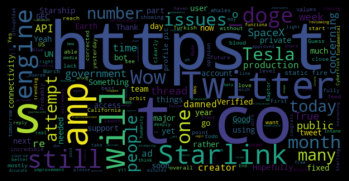

In [7]:
#The World Cloud
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 600, height = 300, random_state = 22, max_font_size = 120).generate(allWords)

#Customize the wordCloud and displaying it
plt.imshow(wordCloud, interpolation = "bilinear")
# Do not show the axies since it makes the image look bad
plt.axis('off')
plt.show()

# Analysis 

This analysis is determine whether the text is positive, neutral, and negative. Negative score is < 0, netureal == 0, and positive > 0.

In [9]:
#Create a funciton for negative, positive, and neutral analysis
def getAnalysis(score):
  #Determine the polarity  
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

#Add another column displaying Analysis
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Display the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Team turned off 1 engine just before start &am...,0.250000,0.000,Neutral
1,: 33 Raptor engine static fire attempt soon ht...,0.900000,0.500,Positive
2,: First static fire attempt of 33 Raptor engin...,0.616667,0.375,Positive
3,Attempting Starship 33 engine static fire http...,0.900000,0.500,Positive
4,Yes!,0.000000,0.000,Neutral
...,...,...,...,...
195,_en SpaceX Starlink has become the connectivi...,0.000000,0.000,Neutral
196,"_en Damned if you do, damned if you don’t",0.000000,0.000,Neutral
197,True,0.650000,0.350,Positive
198,"Yeah, it’s bizarre!",0.600000,0.500,Positive


# Display positive tweets

In [10]:
# Print all positive tweets
k=1 #Iterate the list of positive tweets
sortedDF = df.sort_values(by=['Polarity']) #Sort the dataframe into polarity
#Display all positive tweets based on the count from previous code
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]== 'Positive'):
    print(str(k) + ')' +sortedDF['Tweets'][i])
    print()
    k+=1

1): 33 Raptor engine static fire attempt soon https://t.co/wrsWIDt4Vt

2): First static fire attempt of 33 Raptor engines on Booster 7 https://t.co/3haor6owfa

3)Attempting Starship 33 engine static fire https://t.co/FJ3tLsnlck

4): dude bookmarks are an awesome twitter feature, especially when preparing for a twitter spaces where you want to talk about pa…

5) Too many journalists want to shape your opinion, rather than inform you

6): Starlink is now available in Iceland → https://t.co/slZbTmZmAt https://t.co/f7mKS8USnt

7)_Morrows Exactly

8) That engine performed an incredible number of transformations to match Mach number!

9)Recommendation algorithm should be fixed tomorrow

10) Since he placed many of them there himself, he would indeed not be “surprised” lmao

11) My pet theory is that too much Adderall is making people grumpy 😂 https://t.co/HscbKgPRCP

12) Very concerning

13) True

14) We are reaching out to understand more

15): NEWS: The  Model Y was the best selling vehicl

# Print Negative Tweets

In [ ]:
# Print all negative tweets
k=1 #Iterate the list of negative tweets
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False') 
#Display all negative tweets based on the count from previous code
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]== 'Negative'):
    print(str(k) + ')' +sortedDF['Tweets'][i])
    print()
    k+=1

# Print neutral tweets

In [ ]:
# Print all neutral tweets
k=1 #Iterate the list of negative tweets
sortedDF = df.sort_values(by=['Polarity']) 
#Display all neutral tweets based on the count from previous code
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]== 'Neutral'):
    print(str(k) + ')' +sortedDF['Tweets'][i])
    print()
    k+=1

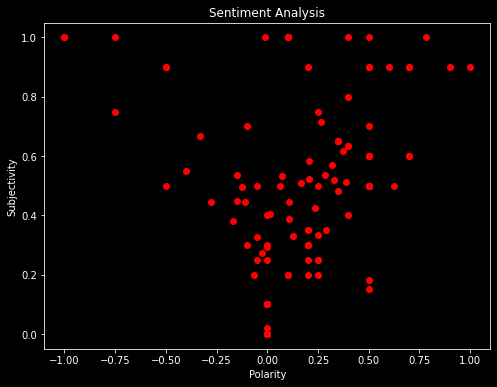

In [11]:
# Plot polarity and subjectivity using Scatter Plot
#create the Scatter Plot size
plt.figure(figsize=(8,6))
#configure the scatter plot and display the scatter plot
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# Calculations and Pie Chart

In [ ]:
# Calcualte the percentages of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1) #Calculate the percentage

In [ ]:
# Calcualte  the percentages of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1) #Calculate the percentage

In [ ]:
# Calcualte  the percentages of neutral tweets
neutweets = df[df.Analysis == 'Neutral']
neutweets = neutweets['Tweets']

round((neutweets.shape[0] / df.shape[0]) * 100, 1) #Calculate the percentage

In [ ]:
#Show value counts
df['Analysis'].value_counts()

#Plot and visualzie the counts using a pie chart
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops={'color':"r"})
plt.show()

# Resources

In order to complete the Sentiment Analysis on Elon Musk's page, it required libraries in order to do my analysis.

#### Documentation:
*   https://docs.tweepy.org/en/stable/ (Tweepy)
*   https://pandas.pydata.org/docs/ (Pandas)
*   https://numpy.org/doc/ (Numpy)
*   https://matplotlib.org/stable/index.html (Matplotlib)
*   https://textblob.readthedocs.io/en/dev/ (Text Blob)
*   https://python-course.eu/applications-python/python-wordcloud-tutorial.php (Word Cloud)

Help guided this Sentiment Analysis by understanding how to display and the syntax.

### Code Skeleton:
*   https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/ 

Help set up Sentiment Analysis. I used this as a guide in helping me make this sentiment analysis. I further implemented this by doing more analysis to it as you can see above.











